In the last file, we explored communication in a scenario where we dealt directly with our manager. That's a very common occurrence in all kinds of institutional organization systems.

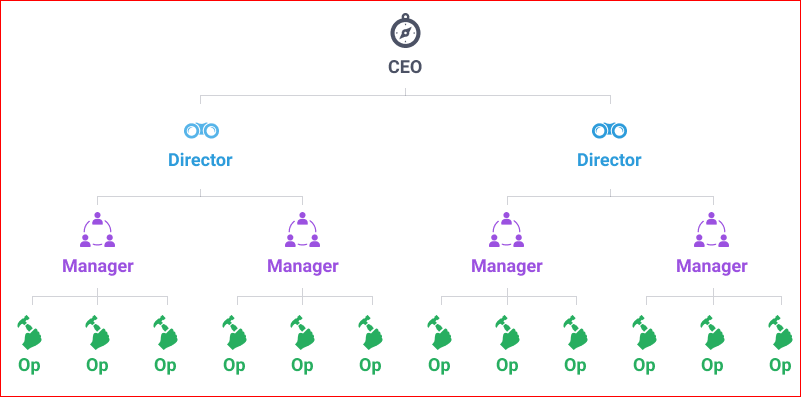

Even though many companies operate on a [line organization](https://www.managementstudyguide.com/line_organization.htm) (see the diagram above), where most requests come directly from our manager, many times we'll be recruited to work on multiteam projects. These projects tend to be relatively big and:

* They usually employ a [project manager](https://en.wikipedia.org/wiki/Project_manager) — someone who's responsible for overseeing the project from start to finish.
Because the projects are expensive, they usually require [sponsors](http://www.businessdictionary.com/definition/project-sponsor.html) — people (usually high up in the hierarchy) who are responsible for the vision and accomplishment of the project. Sponsors are also responsible for:
 * Allocating resources, financial and otherwise
 * Making important [high-level](https://dictionary.cambridge.org/pt/dicionario/ingles/high-level) decisions
* Representatives of the participating teams — sometimes these are managers, sometimes they are regular employees

The people above are also [stakeholders](https://en.wikipedia.org/wiki/Project_stakeholder): "an individual, group, or organization, who may affect, be affected by, or perceive itself to be affected by a decision, activity, or outcome of a project."


Not only will we need to communicate with other teams in projects, many companies even operate like this. It's a different kind of hierarchy called [functional organization](https://www.managementstudyguide.com/functional_organization.htm), in which requests can come from all over the company. This is often the case when a company has a team dedicated to data science.

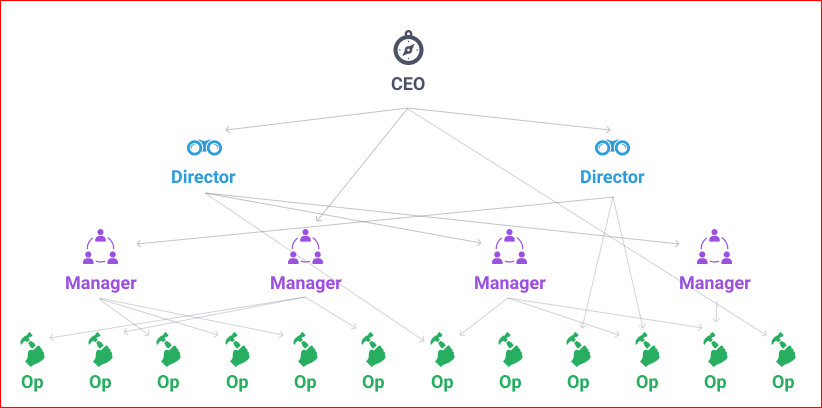

We see that there's a large swath of people who we may need to communicate with. They will have varying degrees of data literacy, which makes it harder to not only report results, but also:

* Makes it harder for these colleagues to request things of us
* Makes it harder for us to manage a larged and varied influx of requests

In this file, we'll learn how to communicate effectively as a data professional with people whose data skills aren't as sharp as our own.

Here's the scenario. We're working for one of Google's data science teams and someone from another team, specifically an [account manager](https://en.wikipedia.org/wiki/Account_manager) — "a person who works for a company and is responsible for the management of sales and relationships with particular customers" — approaches us with a request. She wants to take a prophylactic approach and improve the revenue of undervalued apps to motivate the developers to keep working on them.

Since her department's budget for marketing won't allow her to invest on ads (which would boost the number of sales), the only way to improve the revenue is by tweaking the price. She requests that we determine which paid apps are undervalued (undervalued here means that their price could be increased without lowering demand).

We talk it over with our manager and we come to the decision of prototyping this project, that is, making a rough analysis with some lax (careless) assumptions, instead of making a full-fledged analysis. Prototyping has several advantages:

* Having a prototype makes it much easier to estimate the cost of a fully fleshed-out project, be it human, technological, or financial resources.
* Having a more accurate estimate of the cost allows decision-makers to not go through with the project if it doesn't seem profitable enough, or not the best allocation of resources at that point in time.
* It allows grunt workers (like ourselves) to change and add missing requirements to complete the project. Oftentimes these are overlooked and only spotted later; some examples are
    * missing data, 
    * the creation of a new database, 
    * the development of an [API](https://en.wikipedia.org/wiki/Application_programming_interface).
* It allows business people (like the account manager) to tweak the project's goal.
* It gives all stakeholders an opportunity to add easily accomplishable side-goals given the main goal, thus maximizing the project's output.

Despite the above, we should not only limit the scope of the project (focus on one goal) when prototyping, but we should also timebox it — prototypes without deadlines run the danger of becoming time wasters that do not let us capitalize on the above advantages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
playstore = pd.read_csv("googleplaystore.csv")
print(playstore.shape)

(10841, 13)


In [3]:
print(playstore.iloc[[10472, 10473]]) 

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   
10473                  osmino Wi-Fi: free WiFi    TOOLS     4.2  134203   

         Size     Installs  Type     Price Content Rating             Genres  \
10472  1,000+         Free     0  Everyone            NaN  February 11, 2018   
10473    4.1M  10,000,000+  Free         0       Everyone              Tools   

         Last Updated Current Ver Android Ver  
10472          1.0.19  4.0 and up         NaN  
10473  August 7, 2018     6.06.14  4.4 and up  


Entry at index `10472` has incorrect data. Upon further inspection , we can tell that it seems that the **category's** field is missing and that made it so that the following values were shifted. Moreover, the **genre** value is also missing.

Given that this is only one entry, we could very easily ask the team responsible for the data to fix this. Or, better yet, try to fix it ourselves, since this is a prototype and something we can possibly fix with a quick Google search.

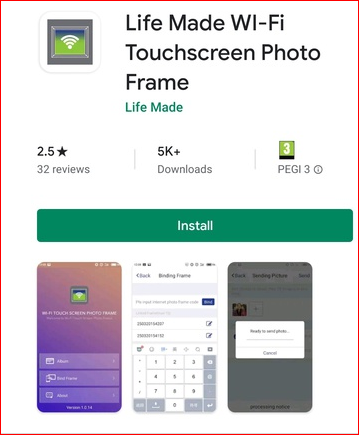

Because the information concerning the data is easily available to both teams, whether we ask the other team or fix it ourselves depends on several factors. Here are a few questions we can ask to help us decide:

* Is it a proxy or the actual information we need?
 * If it is a proxy, what's the level of risk that comes from using it?
* How long will it take us vs. how long will it take the other team?
* How important is this information?

In [4]:
playstore.drop(10472, inplace = True)

Above, we dropped the problematic row because it is a free app and our project is focused on paid apps.

In [5]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


We notice that there are several columns which should have a numeric format but whose type is **object**. Specifically, `Reviews`, `Size`, and `Price`. 

* **Reviews**: No problems with this column, the only reason why pandas didn't used the proper type for this column was the presence of the problematic row we got rid of above.

* **Size**: We may have noticed that the Size values contains letters like M and k, signifying memory size units. To clean this column, we'll use the function.

* **Price**: Some of the values include a `$`, it's enough to get rid of it to get the value ready for conversion.

In [6]:
playstore["Price"] = playstore["Price"].str.replace("$","").astype(float)

In [7]:
paid = playstore[playstore["Price"] != 0].copy()

In [8]:
# Drop the Type column from paid.

paid.drop("Type", axis = "columns", inplace = True)

In [9]:
# Set the type of paid["Reviews"] column to int.

paid["Reviews"] = paid["Reviews"].astype(int)

In [10]:
def clean_size(size):
    """Convert file size string to float and megabytes"""
    size = size.replace("M","")
    if size.endswith("k"):
        size = float(size[:-1])/1000
    elif size == "Varies with device":
        size = pd.np.NaN
    else:
        size = float(size)
    return size
    

In [11]:
paid["Size"] = paid["Size"].apply(clean_size)

In [12]:
paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 12 columns):
App               800 non-null object
Category          800 non-null object
Rating            647 non-null float64
Reviews           800 non-null int32
Size              724 non-null float64
Installs          800 non-null object
Price             800 non-null float64
Content Rating    800 non-null object
Genres            800 non-null object
Last Updated      800 non-null object
Current Ver       798 non-null object
Android Ver       799 non-null object
dtypes: float64(3), int32(1), object(8)
memory usage: 78.1+ KB


Some apps appear more than once. Let's start by removing all repeated data points across all columns. To do this, we'll use the [DataFrame.drop_duplicates() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) with the appropriate options:

In [13]:
paid.duplicated().sum()

35

In [14]:
print("Number of rows before dropping duplicates: {}".format(paid.shape[0]))


Number of rows before dropping duplicates: 800


In [15]:
paid.drop_duplicates(inplace = True)

In [16]:
print("Number of rows after dropping duplicates: {}".format(paid.shape[0]))

Number of rows after dropping duplicates: 765


If we consider just the `App` column as the duplicate-finding criteria, we see that we still have a few duplicated apps:


In [17]:
print(paid.duplicated(subset="App").sum())

9


Each duplicate exists for one of two reasons:

* Everything is equal except the category
* Everything is equal except the number of reviews

The instances of the first reason are the apps **Fuzzy Numbers: Pre-K Number Foundation** and **Toca Life: City**, which both appear with the categories **EDUCATION** and **FAMILY**. Investigating the apps on the Play Store leads us to conclude that the **FAMILY** category isn't correct, so we'll get rid of these rows:

In [18]:
app_mask = paid["App"].isin(["Fuzzy Numbers: Pre-K Number Foundation", 
                             "Toca Life: City"])
# Alternate
# paid[(paid["App"] == "Fuzzy Numbers: Pre-K Number Foundation") | (paid["App"] == "Toca Life: City")]
app_mask.sum()

4

In [19]:
category_mask = paid["Category"] == "FAMILY"

In [20]:
paid[app_mask & category_mask]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2151,Toca Life: City,FAMILY,4.7,31100,24.0,"500,000+",3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up
4301,Fuzzy Numbers: Pre-K Number Foundation,FAMILY,4.7,21,44.0,"1,000+",5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up


In [21]:
paid.drop([2151,4301], inplace = True)

In [22]:
paid.duplicated(subset = "App").sum() # And we eliminate two duplicates.

7

We're going to drop the duplicates whose number of reviews are not the highest.

In [23]:
# Sort paid by the number of reviews in descending order

paid.sort_values("Reviews", ascending = False, inplace = True)

In [24]:
paid.drop_duplicates(subset = "App", inplace = True)

In [25]:
print(paid.duplicated("App").sum())

0


In [26]:
# Reset the index of paid.
# Pass True to the drop argument in order to not save the old index.
paid.reset_index(drop = True, inplace = True)

Now that we have cleaned the data, it's time to dive into some data exploration.

Note that we still haven't defined what **undervalued apps** means here. The science in data science is partially justified by the fact that some kinds of problems we encounter need research to even be properly defined. We need to get to know the data before contemplating what proxy to use to approximate the concept of undervalued.

Since this request is centered on the price, we'll start with that column. Let's create a histogram for this column:

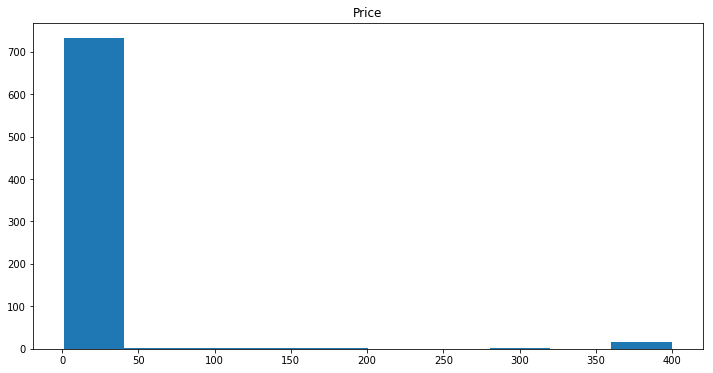

In [27]:
paid.hist(column = "Price",grid = False, figsize = (12,6))
plt.show()

The distributions of prices is heavily skewed to the left and we have a few outliers. These are data points that are markedly different from the remaining ones. Let's take a look at them.

In [28]:
paid.sort_values("Price", ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
277,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,"10,000+",400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
207,I am Rich Plus,FAMILY,4.0,856,8.7,"10,000+",399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
355,I am rich (Most expensive app),FINANCE,4.1,129,2.7,"1,000+",399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
371,I am Rich!,FINANCE,3.8,93,22.0,"1,000+",399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
155,I Am Rich Premium,FINANCE,4.1,1867,4.7,"50,000+",399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up


It seems these apps are not only very niche, but they also would spoil our data, given how disparate the prices are from the others.

Looking back at the histogram, it's clear that the vast majority of apps have a price significantly below `$`50. Let's restrict our analysis to these rows:

In [29]:
affordable_apps = paid[paid["Price"]<50].copy()

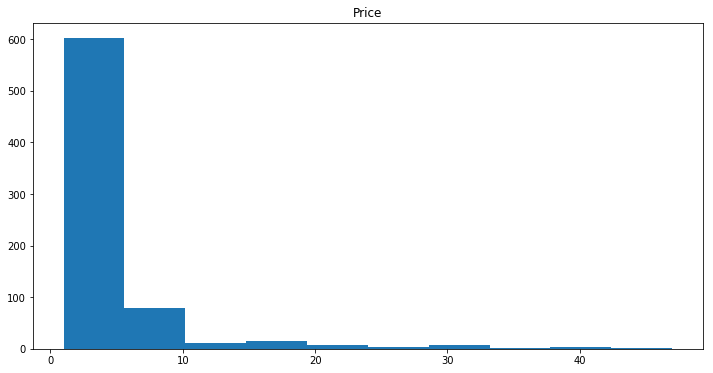

In [30]:
affordable_apps.hist("Price", grid = False, figsize = (12,6))
plt.show()

Even though we got rid of the outliers, it is still quite skewed. There seems to be a clear difference between the amount of apps costing less $5 and the remaining ones.

In [31]:
cheap = affordable_apps["Price"] <5
print(cheap.sum())
print(cheap.shape[0])

596
733


In [32]:
reasonable = affordable_apps["Price"] >=5
print(reasonable.sum())
print(reasonable.shape[0])

137
733


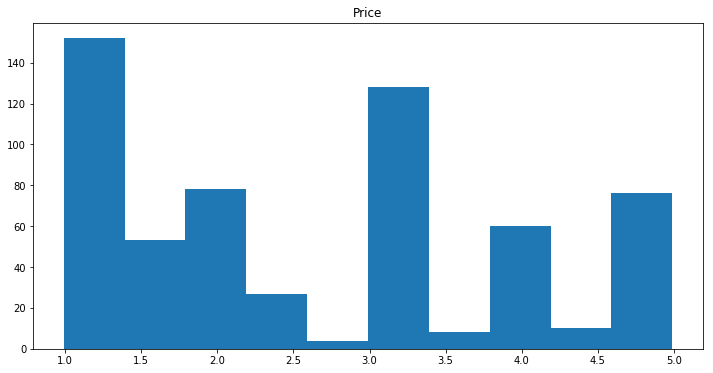

In [33]:
affordable_apps[cheap].hist("Price",grid = False, figsize = (12,6))
plt.show()

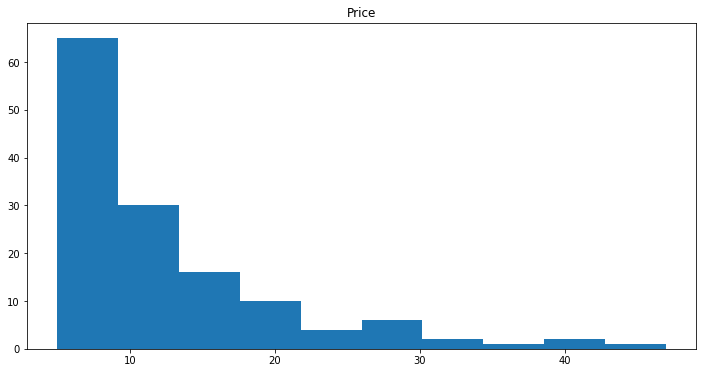

In [34]:
affordable_apps[reasonable].hist(column="Price", grid=False, figsize=(12,6))
plt.show()

We saw that the reasonable apps are still somewhat skewed, although much less so than the dataset as a whole. We should be mindful of this in our analysis moving forward.

In [35]:
# Create a column in affordable_apps called affordability. 
# It should have the value cheap if the price is lower than 5, and reasonable otherwise.

affordable_apps["affordability"] = affordable_apps["Price"].apply(lambda p: "cheap" if p <5 else "reasonable")

# or
# affordable_apps["affordability"] = affordable_apps.apply(lambda row: "cheap" if row["Price"] < 5 else "reasonable",axis=1)

In [36]:
affordable_apps["affordability"].value_counts()

cheap         596
reasonable    137
Name: affordability, dtype: int64

Having grasped the behavior of the price by itself, it's time to compare it to the other columns.

Several columns stand out as being relevant. We'll focus on the `rating`, `category` and `genres`. Let's start by visualizing how price relates to rating.

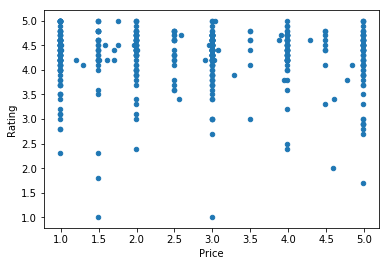

In [37]:
affordable_apps[cheap].plot(kind = "scatter",x = "Price",y = "Rating")
plt.show()

We learned about a way to measure "how related" two numerical variables are, it's called the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) — it ranges between -1 and 1, and the closer it is to 0 the less related the variables are.

In the graph above, we see that there doesn't seem to be any clear relation between price and rating for the cheap apps. In fact, the Pearson coefficient in this instance is around **-0.06**:

In [108]:
affordable_apps[cheap].corr().loc["Rating", "Price"]

-0.05593771505463038

This is good news for our price tweaking strategy, because it suggests that we can change prices without it being reflected in the apps' rating.

We can increase the price of those apps that cost less than, say, the mean cheap price, to the mean cheap price. We would then monitor the behavior of these apps — possibly by using statistical techniques like **hypothesis testing**, — to confirm that there is an increase in profits.

In [109]:
# mean price of the cheap apps and assign it to cheap_mean.
cheap_mean = affordable_apps.loc[cheap, "Price"].mean()
cheap_mean

2.5803187919463153

In [110]:
affordable_apps["price_criterion"] = 0

In [111]:
# price_criterion that takes the value 1 when the app's price is lower than cheap_mean, and 0 otherwise.
affordable_apps.loc[cheap, "price_criterion"] = affordable_apps["Price"].apply(lambda price : 1 if price < cheap_mean else 0)

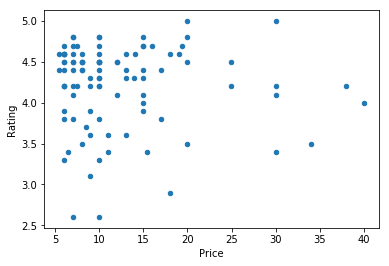

In [112]:
# scatter plot for the reasonable apps.
affordable_apps[reasonable].plot(kind = "scatter", x = "Price", y = "Rating")
plt.show()

In [113]:
affordable_apps[reasonable].corr().loc["Rating", "Price"]

-0.048609647085130735

Conclude that reasonable apps there also isn't any significant relationship between price and rating.

In [114]:
reasonable_mean = affordable_apps.loc[reasonable, "Price"].mean()

In [115]:
affordable_apps.loc[reasonable,"price_criterion"] = affordable_apps["Price"].apply(
    lambda price: 1 if price < reasonable_mean else 0)

In the interest of getting some quick results for our prototype, we'll now focus on the `categories` and `genres`, leaving other features for another time.

Looking at the first few rows of `affordable_apps`, we see that multiple genres are separated by **`;`**:

In [116]:
affordable_apps.iloc[4]

App                 Where's My Water?
Category                       FAMILY
Rating                            4.7
Reviews                        188740
Size                               69
Installs                   1,000,000+
Price                            1.99
Content Rating               Everyone
Genres             Puzzle;Brain Games
Last Updated             July 5, 2018
Current Ver                    1.16.0
Android Ver                4.2 and up
affordability                   cheap
price_criterion                     1
Name: 4, dtype: object

Since `affordable_apps` has only around 700 rows and the **genres** column can take many different values, segmenting by this column could spread our data too thin to extract any significant insights. Instead of simply ignoring it, we'll extract some information from there and see where that leaves us.

Looking at the possible values for this column, we see that `;` isn't part of the name of any single genre:

In [117]:
print(affordable_apps["Genres"].unique())

['Arcade;Action & Adventure' 'Action' 'Strategy' 'Puzzle;Brain Games'
 'Card;Action & Adventure' 'Sports' 'Personalization' 'Arcade' 'Puzzle'
 'Productivity' 'Weather' 'Tools' 'Sports;Action & Adventure'
 'Communication' 'Role Playing' 'Photography' 'Card'
 'Simulation;Education' 'Adventure' 'Education;Pretend Play' 'Lifestyle'
 'Strategy;Action & Adventure' 'Board' 'Finance' 'Health & Fitness'
 'Role Playing;Action & Adventure' 'Music' 'Travel & Local' 'Business'
 'Simulation' 'Adventure;Action & Adventure' 'Parenting'
 'Adventure;Brain Games' 'Entertainment' 'Maps & Navigation'
 'Video Players & Editors' 'Racing' 'Medical' 'Auto & Vehicles'
 'Educational;Pretend Play' 'Casual;Pretend Play' 'Education;Creativity'
 'Education' 'Board;Brain Games' 'Food & Drink'
 'Action;Action & Adventure' 'Simulation;Pretend Play' 'Dating'
 'Books & Reference' 'Art & Design' 'Racing;Action & Adventure' 'Casual'
 'Education;Education' 'Educational;Education' 'Casual;Education'
 'Shopping' 'Books & Refe

Let's create a column that counts the number of genres to which each app belongs. To do this, we'll use the [Series.str.count() string accessor](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.count.html). It takes a regular expression as input and it counts the number of occurences of the given pattern.

In [118]:
affordable_apps["genre_count"] = affordable_apps["Genres"].str.count(";")+1

We counted the occurrences of **`;`** in the Genres column above for each row, which give us the number of separators, and we added one to get the number of values.

Let's now see how the mean price varies across the number of genres.

In [119]:
genres_mean = affordable_apps.groupby(["affordability", "genre_count"]).mean()[["Price"]]
genres_mean

Price
affordability genre_count           
cheap         1             2.507448
              2             3.155672
reasonable    1            12.574627
              2             6.823333

Curiously, apps that belong to two genres are more expensive among the cheap apps and cheaper among the reasonable apps.

For each segment, let's label the apps that cost less than their corresponding segments' mean with 1, and the others with 0:

In [120]:
def label_genres(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["affordability"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < genres_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0



In [121]:
affordable_apps["genre_criterion"] = affordable_apps.apply(label_genres, axis="columns")

In [122]:
# we'll perform the same procedure for Category that we did for genre_count.

categories_mean = affordable_apps.groupby(["affordability", "Category"]).mean()[["Price"]]

In [123]:
def label_categories(row):
    """For each segment in `categories_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["affordability"]
    cat = row["Category"]
    price = row["Price"]

    if price < categories_mean.loc[(aff, cat)][0]:
        return 1
    else:
        return 0

In [124]:
affordable_apps["category_criterion"] = affordable_apps.apply(label_categories, axis="columns")

We now have three binary criteria to helps decide whether or not an app's price should increase. How do we put them to use?

We can use a technique called **majority voting**, in which we decide whether an app's price should increase based on all criteria.

Imagine this is an election and each criterion is a voter. For each app, we're going to count the number of votes for each result, and the majority will be declared the winner. Note that since we have three criterions and two possible values for each criterion, ties are impossible.

Let's create a column in `affordable_apps` that takes the value of `1` when the majority is `1` and the value of `0` when the majority is `0`.

In [125]:
criteria = ["price_criterion", "genre_criterion", "category_criterion"]

affordable_apps["Result"] = affordable_apps[criteria].mode(axis = "columns")

In [126]:
affordable_apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result
73,Football Manager Mobile 2018,SPORTS,3.9,11460,NaN,"100,000+",8.99,Everyone,Sports,"June 27, 2018",Varies with device,4.1 and up,reasonable,1,1,1,1,1
261,Depths of Betrayal CE (Full),FAMILY,4.3,363,14.0,"1,000+",2.99,Everyone 10+,Casual,"August 19, 2013",1.0.0,2.3 and up,cheap,0,1,0,0,0
357,F05WatchFace for Android Wear,PRODUCTIVITY,3.9,127,5.9,"1,000+",0.99,Everyone,Productivity,"December 24, 2017",7.0.1,4.3 and up,cheap,1,1,1,1,1
425,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47,1.4,"1,000+",3.08,Everyone,Books & Reference,"May 27, 2016",1.22,2.2 and up,cheap,0,1,0,0,0
366,Medical terms (OFFLINE),MEDICAL,4.4,104,38.0,"1,000+",2.99,Teen,Medical,"May 24, 2018",3.2.0,4.1 and up,cheap,0,1,0,0,0


It seems to be working as intendend. Let's see how many apps are eligible for a price increase

In [127]:
nr_eligible = affordable_apps["Result"].sum()


In [128]:
print(nr_eligible, (nr_eligible/affordable_apps.shape[0])*100, sep="\n")

401
54.70668485675307


We see that 401 apps — roughly 55% of the paid apps — are eligible for a price increase. This is a significant number, and we consider the possibility that increasing the price for these apps will have a significant impact.

Estimating the impact of a project, big or small, is an important part of publicizing our work. In an ideal world, we'd have the data for how many times each app was bought, but we don't.

We could potentially fall back on the number of installations as a proxy for this, but unfortunately, our Installs column just gives us ranges and not exact numbers.

In any case, given the lack of options, we'll fall back on this obviously faulty proxy in order to estimate the impact. In addition to it not being the main goal of this prototype, the lack of data also makes it hard to decide what the optimal price for each app is. Instead, we'll use the mean price of the affordability of the eligible apps when it is higher than the current price.

In [129]:
# column in affordable_apps called New Price that should be:
# The maximum between Price and cheap_mean for the cheap apps, rounded to two decimal places

def new_price(row):
    if row["affordability"] == "cheap":
        return round(max(row["Price"], cheap_mean), 2)
    else:
        return round(max(row["Price"], reasonable_mean), 2)

In [130]:
affordable_apps["New Price"] = affordable_apps.apply(new_price, axis = 1)

In [133]:
# Transform Installs into a numeric column
affordable_apps['Installs'] = affordable_apps['Installs'].str.replace("[+,]", "").astype(int)

In [137]:
# Compute the impact for each app:
# Compute the difference between the new price and the current price. Multiply it by Installs.

affordable_apps["Impact"] = (affordable_apps["New Price"]-affordable_apps["Price"])*affordable_apps["Installs"]

total_impact = affordable_apps["Impact"].sum()
print(total_impact)

115441618.98


We computed the minimum estimated impact. Minimum because the number of installations represents the low end of the range — it's not the actual number of installations.

Our result was worth of $115 million! This is too optimistic, especially considering that people can install the app, use the freeware version and not pay at all. The proxy failed, and that's okay. Data science resembles research and development more than it does procedural deterministic tasks; data practitioners are bound to run into some dead ends.

We fell short on evaluating the impact due to lack of data. A possible next step would be to request data concerning the number of purchases.

Before we clean up our findings for communication, let's list some possible next steps for this project:

* Include unused data in the analysis, specifically:
 * The number of reviews;
 * The size of the app;
 * The content rating;
 * The last time the app was updated;
 * The app's Android versions;
* Analyze the data on multiple levels. For example, instead of just looking at categories and genres individually, we can see
    * what happens for each valid combination of category and genre. Or 
    * category, genre and content rating, and so on.
* Get more rows on the dataset. We worked with roughly 700 hundrers apps, which makes it hard to drill down on multiple levels.
* Do advanced statistical analysis.
* Determine optimal prices for each app.
* Get data that allows us to better classify the undervalued apps and estimate the impact.

When communicating our findings, we should be mindful of our audience. The more technical they are, the more we can communicate our work verbatim.

Large projects usually involve people without the technical acuity to follow the details. Not only that, the details are often unimportant for the bigger picture — which is what we want to focus on.

In these situations, we should favor metaphors and analogies over technical jargon, and use plenty of visualizations. We also do not need to take our audience through a complete tour of our work, but rather focus on telling a cohesive story.

In this instance, our audience consists of our manager, the account manager who first reached out to us, and her manager

Let's create a summary of our work that we can use for a presentation. In what follows, side comments are in-between parentheses.

### Data Quality

We found one erroneous data point which not only wasn't important, it was easy to fix. We should monitor this if management decides to move forward with the project to make sure it doesn't become an issue later on.

We also found quite a few duplicates that were relatively easy to handle, but it would be better to deal with this from the start, lest it becomes a hard-to-manage problem.

### Apps Prices

Since the main goal of this project is to find undervalued apps, price is the central theme through which our analysis will revolve around.

As a whole, the distribution of prices among the paid apps is tremendously skewed.

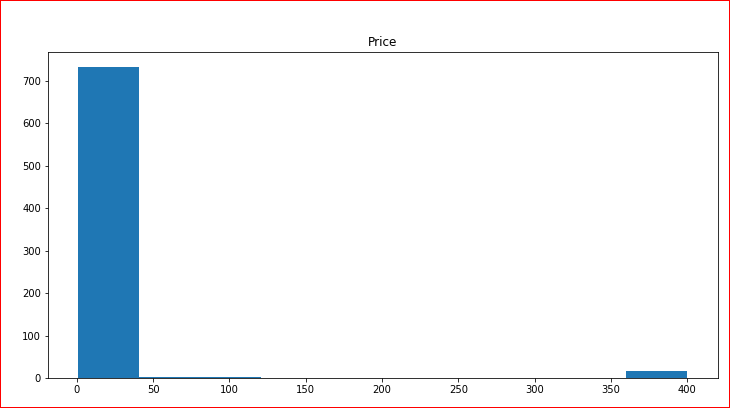

As we can see, almost all of the apps cost less than $50. (It's a good idea to make our graphs easier to understand for people by supplementing our presentation with an oral or written reading of some values).

There also are a few outliers that are unlikely to be relevant for this analysis:
    
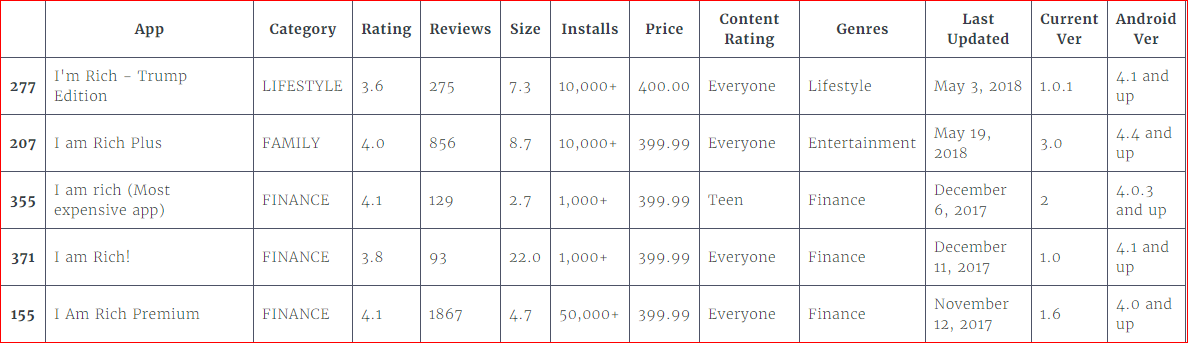

(Showing the outliers is an unimportant detail, but it presents an opportunity to have a lighthearted, humorous interruption, which helps with energizing the audience, keeping them engaged).

For these reasons, we removed the outliers from the analysis and focused on the apps costing less than $50. We ended up with a little over 700 rows of data.

We found that even among the remaing rows, the distribution of prices was still skewed, with the vast majority of apps costing less than $5.

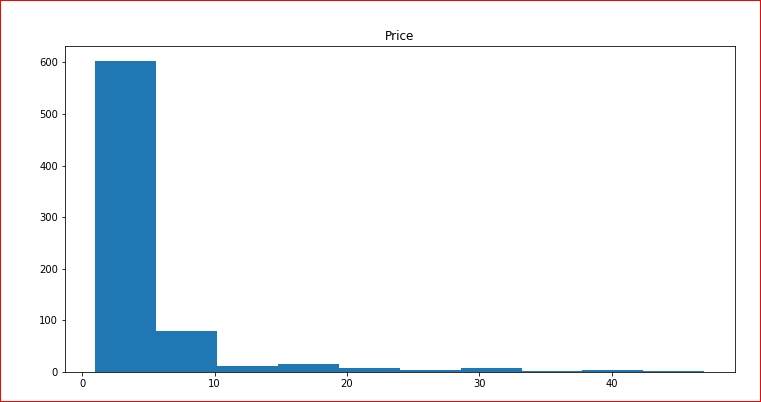

So we decided to separate the apps into two different groups. Those that cost less than $5 — from now on the cheap apps — and the remaining ones — from now on the reasonable apps_. We'll call this feature "Affordability".

### Strategy

In order to limit the scope of this prototype, we included only four more features in our analysis: `the ratings`, `the affordability`, `the categories`, and `the genres`.

We separated the data into price groups and broke those down according to category and genre to determine the candidates for price increases.

### Prices vs. Other Features

We've found there isn't any meaningful relationship between the price and the rating.

(Notice how we avoided mentioning the Pearson coefficient — it's a technical detail that isn't important to our audience.)

As an example, in the graph below, we have the price on the horizontal axis, and the rating on vertical axis. We see that price's column of data points are virtually indistinguishable from one another.

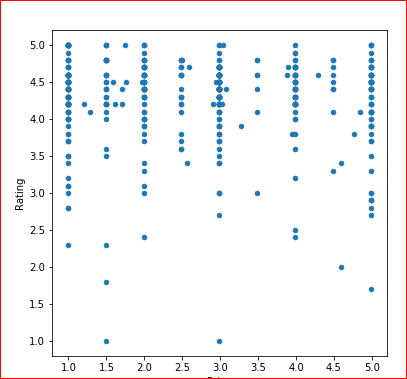

(Notice also that we're only showing the graph for the cheap apps. Since the reasonable apps behave in the same way, there is no need to overload the presentation by including another graph. However, we can – and should – be able to explain what happens with the reasonable apps if anyone asks.)

As for the genres, since each app can belong to multiple genres, and given that we only have around 700 rows of data, we decided not to drill down into the genres, but instead limit our analysis to counting the number of genres for each app and computing the average.

(Notice that we didn't specify that we used the mean. In the English language, "average" can mean multiple things. It is usually used as a number that describes data in mass. That we used the mean, is another technical detail that is important for the analysis, but not important for the presentation.)

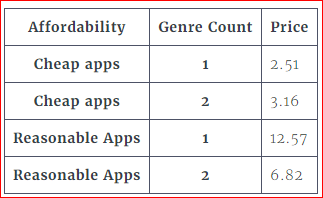

(We altered the table we saw during our work to make it more presentable. We modified the column names, we used the terms "cheap apps" and "reasonable apps", and we rounded the prices to two decimal places — we don't want our audience to lose the thread because they can't read the table).

We notice that cheap apps with multiple genres cost more than cheap apps with a single genre. The opposite happens among the reasonable apps.

For each app, the vote cast by the genres feature is determined by how the price of the app relates to the average of its number of genres: Those that cost less than the average are eligible for price increase.

As an example, suppose "An Amazing App" is a reasonable app that belongs to two genres. If its price is lower than $6.82, then the vote is that its price should increase.

We used a similar strategy for the categories: We computed the average for each category and cast the vote in analogous way.

(There is no need to show another example of the same thing, but we should be prepared to talk a little bit more about it, or show our work in case someone asks to see it.)

### Results and Impact

Upon casting the votes and finding the majority, out of the 733 apps that were analyzed, 401 apps (roughly 55%) were deemed eligible for a price increase.

To estimate the impact that increasing prices could have, we want to find the optimal price and have a sense of how many times each app will be purchased.

It wasn't the goal of this prototype to determine the optimal price, so as a quick proxy, we used the average price for each app's affordability. As for the amount of times each app will be purchased, we don't have access to the data, so we tried to use the number of installations instead.

However, this proxy turned out to be inaccurate and unrealistic, so we failed to estimate the impact with the given data.

In any case, given that roughly 60% of apps seem to be undervalued, our recommendation is that we move forward with this project. Here a few suggestions going forward.

(We should strive for a project to culminate in a recommendation and call to action.)

### Next Steps

Some possible next steps are:

* Including unused data in the analysis.
* Get more data, such as:
 * More features — like the number of times each app was purchased.
 * A greater volume of data (we were working with just a little over 700 data points).
* Select a sample of the eligible apps, increase their price and monitor the behavior of the purchases.
* Determine optimal prices for each app.

Zooming out and looking at this from a project management perspective, what we explored in this file was the data component of the prototype in the first node of the following project management flowchart.

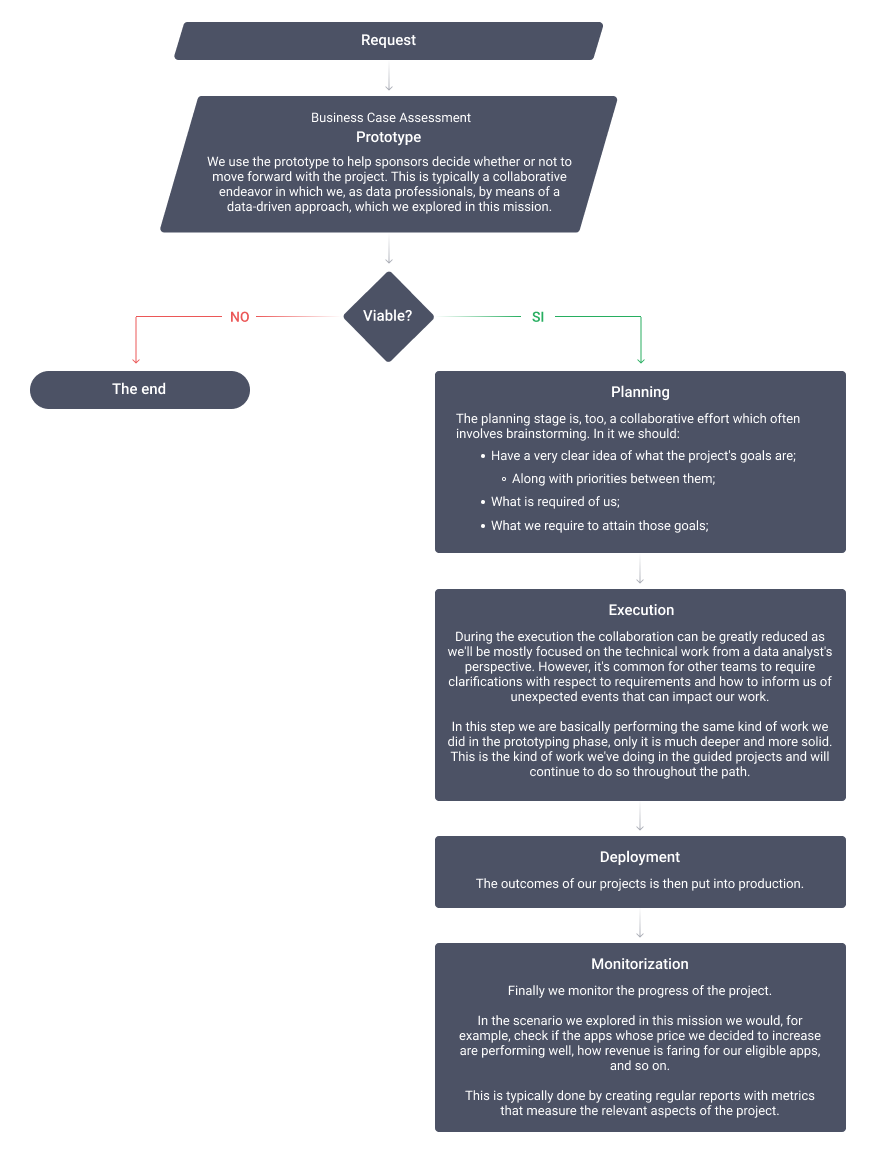

In [139]:
Image("with+description.png")

In this file we learned:

* About the business context in which data science happens in an organization
* About the importance of prototyping
* How to communicate with a non-technical audience
* The business workflow